In [3]:
#CODE TO SCRAPE COMMENTS FROM YOUTUBE, THIS CODE CAN BE MODIFIED TO EXTRACT FEATURES FRM ANY OTHER WEBSITES AS WELL BY MAKING
#CHANGES TO comment_div AND url
#YOUTUBE VIDEO USED HER ONE OF THE MOST DISLIKED VIDEOS ON YOUTUBE


# pip install selenium
# pip install beautifulsoup4
# pip install webdriver-manager

from selenium import webdriver
from webdriver_manager.firefox import GeckoDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd


def ScrapComment(url):
    option = webdriver.FirefoxOptions()
    option.add_argument("--headless")
    driver = webdriver.Firefox(executable_path=GeckoDriverManager().install(), options=option)
    driver.get(url)
    #to give time for url to load
    time.sleep(5)
    prev_h = 0
    while True:
        start = time.time()    
        height = driver.execute_script("""
                function getActualHeight() {
                    return Math.max(
                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                    );
                }
                return getActualHeight();
            """)
        driver.execute_script(f"window.scrollTo({prev_h},{prev_h + height*0.005})")
        # fix the time sleep value according to your network connection
        #we are giving this time below as we need to 
        if (time.time()-start) > 3000:
            break
        time.sleep(3)
        prev_h += height*0.005
        if (time.time()-start) > 3000:
            break
        if prev_h >= height:
            break
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    title_text_div = soup.select_one('#container h1')
    ## altrenate way to write is as text is below with and, not reqd below one,could have been written this way : print(title_text_div.text)
    title = title_text_div and title_text_div.text  
    print(title)
    comment_div = soup.select("#content #content-text")
    comment_list = [x.text for x in comment_div]
    
    print(title," First 5 comments ", comment_list[0:5])
    dff = pd.DataFrame(comment_list)
    dff.to_csv("/Users/himanshu/Documents/backtest/livesignal/jake_paul-itsevryday_bro.csv")


if __name__ == "__main__":
    
    start1 = time.time() 

    urls = [
        "https://www.youtube.com/watch?v=hSlb1ezRqfA",
       
    ]
    ScrapComment(urls[0])
    print(time.time()-start1)



====== WebDriver manager ======
Current firefox version is 96.0
Get LATEST geckodriver version for 96.0 firefox
Driver [/Users/himanshu/.wdm/drivers/geckodriver/macos/v0.31.0/geckodriver] found in cache
/Users/himanshu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object


Jake Paul - It's Everyday Bro (Song) feat. Team 10 (Official Music Video)
Jake Paul - It's Everyday Bro (Song) feat. Team 10 (Official Music Video)  First 5 comments  ['You know quarantine hits you hard when you’re watching this.....', 'Whenever I feel sad or depressed about my life, I just watch this to help remind me that it can always be worse.', 'It is extremely sad that from now on, no one can dislike this video', "i want them to play this at my funeral because everybody else is going to be jealous that i'm dead", "Thanks Jakey, I was struggling with a reason to live, but after finding your song I now conclude that there's no reason to live."]
2709.404573202133


In [ ]:
##CODE TO CLEAN DATA USING NLP TECHNIQUES AND MAKING A WORDCLOUD FOR VISUALISATION

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pylab import rcParams


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himanshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/himanshu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
file = pd.read_csv('/Users/himanshu/Documents/backtest/livesignal/jake_paul-itsevryday_bro.csv', index_col=[0])

In [6]:
file

,0
0,You know quarantine hits you hard when you’re ...
1,Whenever I feel sad or depressed about my life...
2,"It is extremely sad that from now on, no one c..."
3,i want them to play this at my funeral because...
4,"Thanks Jakey, I was struggling with a reason t..."
...,...
1495,Jake paul being blessed by youtube :-)
1496,I bump this in my car every day bro
1497,Every nine year old in 2017: THIS IS FIRE\nEve...
1498,"""PewDiePie is next."" \n\n\nJake on 20M while P..."


In [7]:
df1 = file.copy()
df1

,0
0,You know quarantine hits you hard when you’re ...
1,Whenever I feel sad or depressed about my life...
2,"It is extremely sad that from now on, no one c..."
3,i want them to play this at my funeral because...
4,"Thanks Jakey, I was struggling with a reason t..."
...,...
1495,Jake paul being blessed by youtube :-)
1496,I bump this in my car every day bro
1497,Every nine year old in 2017: THIS IS FIRE\nEve...
1498,"""PewDiePie is next."" \n\n\nJake on 20M while P..."


In [8]:
df1.columns = ['comments']
df1

,comments
0,You know quarantine hits you hard when you’re ...
1,Whenever I feel sad or depressed about my life...
2,"It is extremely sad that from now on, no one c..."
3,i want them to play this at my funeral because...
4,"Thanks Jakey, I was struggling with a reason t..."
...,...
1495,Jake paul being blessed by youtube :-)
1496,I bump this in my car every day bro
1497,Every nine year old in 2017: THIS IS FIRE\nEve...
1498,"""PewDiePie is next."" \n\n\nJake on 20M while P..."


In [9]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [10]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [11]:
corpus = text_transformation(df1['comments'])


In [12]:
#corpus

In [13]:
df1["cleaned_comments"] = corpus

In [14]:
df1

,comments,cleaned_comments
0,You know quarantine hits you hard when you’re ...,know quarantine hit hard watching
1,Whenever I feel sad or depressed about my life...,whenever feel sad depressed life watch help re...
2,"It is extremely sad that from now on, no one c...",extremely sad one dislike video
3,i want them to play this at my funeral because...,want play funeral everybody else going jealous...
4,"Thanks Jakey, I was struggling with a reason t...",thanks jakey struggling reason live finding so...
...,...,...
1495,Jake paul being blessed by youtube :-),jake paul blessed youtube
1496,I bump this in my car every day bro,bump car every day bro
1497,Every nine year old in 2017: THIS IS FIRE\nEve...,every nine year old fire everyone grandma holy...
1498,"""PewDiePie is next."" \n\n\nJake on 20M while P...",pewdiepie next jake pewds bit confusing right


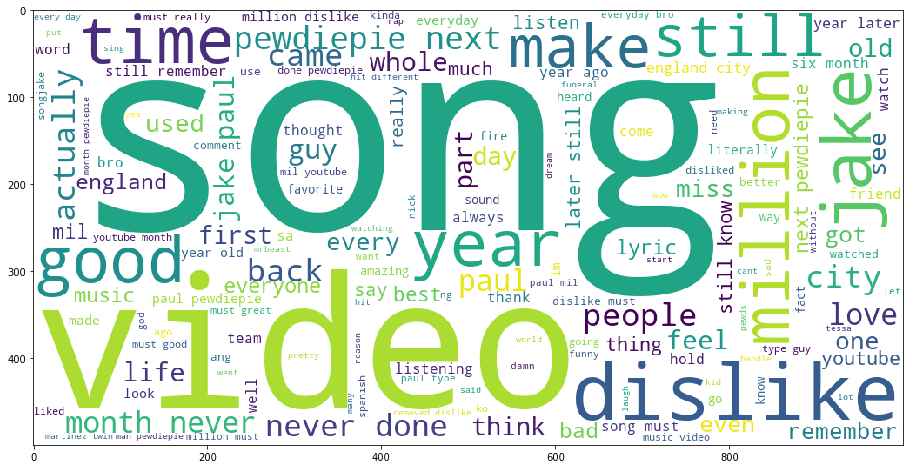

In [15]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)